In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
all_data = pd.read_csv("wine.csv")
all_data.head()

,Class_identifier,Alcohol,Malic_acid,Ash,Alcalinity_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD315_dilutedwines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [ ]:
features = ['Alcohol','Malic_acid','Ash','Alcalinity_ash','Magnesium','Total_phenols','Flavanoids','Nonflavanoid_phenols','Proanthocyanins','Color_intensity','Hue','OD315_dilutedwines','Proline']
output_var=all_data['Class_identifier']

In [ ]:
X = all_data[features]
y = all_data['Class_identifier']

In [ ]:
X.head()

,Alcohol,Malic_acid,Ash,Alcalinity_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD315_dilutedwines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [ ]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Class_identifier, dtype: int64

**Data Preperation** :To prepare the data, we will simply use the OneHotEncoder to encode the integer features into a One-hot vector and we will use a StandardScaler to remove the mean and scale the features to unit variance. Finally we want to perform a train test split to compare our results later on.

In [ ]:
# One hot encoding
enc = OneHotEncoder()
Y = enc.fit_transform(y[:, np.newaxis]).toarray()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
# Scale data to have mean 0 and variance 1 
# which is importance for convergence of the neural network
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Split the data set into training and testing
X_train, X_test, Y_train, Y_test = train_test_split(
    X_scaled, Y, test_size=0.3, random_state=2)

n_features = X.shape[1]
n_classes = Y.shape[1]

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(124, 13)
(54, 13)
(124, 3)
(54, 3)


In [ ]:
Y_train[0:5]

array([[0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [ ]:
print(n_features)
print(n_classes)

13
3


# Building the model

# Model definition

relu=max(0,z) and 16 here is dimension of the output of this layer .

we want to transform the input so we use activation function in deep learning so that learning is happening as it moves from one iteration to the next iteration.

logistic regression also uses optimizer to change the weights to feed back but they don't use activation function unlike deep learning.

here,using softmax as activation function for the output layer it will generate 3 different outputs.say max output value is 0.8 then other 2 value will all add up to 0.2

here loss function is categorical_crossentropy for calculating difference between the actual output and predicted output.

In [ ]:
from tensorflow import keras
from keras import layers
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(3, activation="softmax")
])

# Compiling the model

Here loss function takes the difference between the actual output and the predicted output and feed it to optimizer which is used to adjust the weights for different layers accordingly for the next iteraration in the deep learning model.

adam and rmsprop are 2 optimizer used in deep learning. adam used to be used earlier. rmsprop is more popular now.

In [ ]:
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

In [ ]:
x_val = X_train[:100]
partial_x_train = X_train[100:]
y_val = Y_train[:100]
partial_y_train = Y_train[100:]

# Validating The  approach
Validation data is extremely important otherwise we will not know the optimal training capability of our model building which might lead to overfitting.Setting aside a validation set

In [ ]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=8,
                    batch_size=100,
                    validation_data=(x_val, y_val))

Epoch 1/8
1/1 [==============================] - 1s 640ms/step - loss: 1.1672 - accuracy: 0.3750 - val_loss: 1.0397 - val_accuracy: 0.4300
Epoch 2/8
1/1 [==============================] - 0s 25ms/step - loss: 1.0185 - accuracy: 0.3750 - val_loss: 0.9652 - val_accuracy: 0.4600
Epoch 3/8
1/1 [==============================] - 0s 28ms/step - loss: 0.9254 - accuracy: 0.5000 - val_loss: 0.9078 - val_accuracy: 0.5900
Epoch 4/8
1/1 [==============================] - 0s 24ms/step - loss: 0.8524 - accuracy: 0.6250 - val_loss: 0.8591 - val_accuracy: 0.6800
Epoch 5/8
1/1 [==============================] - 0s 24ms/step - loss: 0.7918 - accuracy: 0.7917 - val_loss: 0.8154 - val_accuracy: 0.7200
Epoch 6/8
1/1 [==============================] - 0s 26ms/step - loss: 0.7379 - accuracy: 0.8333 - val_loss: 0.7757 - val_accuracy: 0.7400
Epoch 7/8
1/1 [==============================] - 0s 24ms/step - loss: 0.6898 - accuracy: 0.8750 - val_loss: 0.7386 - val_accuracy: 0.7900
Epoch 8/8
1/1 [==================

# Training the model

say we have 200 rows of input data and we keep batch size of 100 so we will need to run training on entire data in 2 batches to comple all 200 rows.this is what is meant by the term batch size.

Epocs are number of iteration for which the Deep learning model is being run.

Normally after improving the model accuracy on validation data once the model got fitted.we should then have test data as well and we should run the built model on test data as well.

validation accuracy is the accuracy for validation data.seeing validation accuracy we should decide upto what epoch training model need to run.if validation accuracy becomes almost constant and not tend to improve we can stop training our model uptil that epochs otherwise we will be just doing overfitting.here.accuracy term denotes training accuracy and val_accuracy denotes accuracy for the validation data.

# 64 components-1 Hidden layer,epochs=8,batch_size=100,optimizer="rmsprop" 

Text(0.5, 1.0, 'Training and validation loss')

Text(0.5, 0, 'Epochs')

Text(0, 0.5, 'Loss')

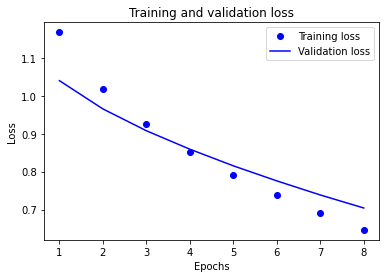

In [ ]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

# Plotting the training and validation loss

Text(0.5, 1.0, 'Training and validation accuracy')

Text(0.5, 0, 'Epochs')

Text(0, 0.5, 'Accuracy')

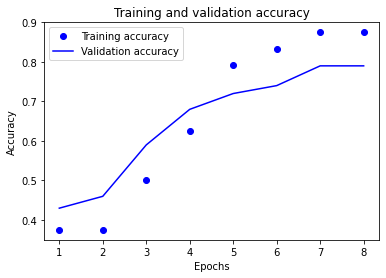

In [ ]:
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Plotting the training and validation accuracy

In [ ]:
# make predictions for test data
y_pred = model.predict(X_test)

2/2 [==============================] - 0s 5ms/step


In [ ]:
print(y_pred[0].shape)
print(np.sum(y_pred[0]))

(3,)
1.0000001


# Retraining the model second time from scratch

In [ ]:
model = keras.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(3, activation="softmax")
])

In [ ]:
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

In [ ]:
x_val = X_train[:100]
partial_x_train = X_train[100:]
y_val = Y_train[:100]
partial_y_train = Y_train[100:]

In [ ]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=19,
                    batch_size=100,
                    validation_data=(x_val, y_val))

Epoch 1/19
1/1 [==============================] - 1s 640ms/step - loss: 1.3585 - accuracy: 0.2500 - val_loss: 1.1973 - val_accuracy: 0.3700
Epoch 2/19
1/1 [==============================] - 0s 23ms/step - loss: 1.2347 - accuracy: 0.3750 - val_loss: 1.1307 - val_accuracy: 0.4300
Epoch 3/19
1/1 [==============================] - 0s 24ms/step - loss: 1.1540 - accuracy: 0.4583 - val_loss: 1.0772 - val_accuracy: 0.5200
Epoch 4/19
1/1 [==============================] - 0s 24ms/step - loss: 1.0889 - accuracy: 0.5417 - val_loss: 1.0318 - val_accuracy: 0.5400
Epoch 5/19
1/1 [==============================] - 0s 24ms/step - loss: 1.0349 - accuracy: 0.6250 - val_loss: 0.9926 - val_accuracy: 0.5800
Epoch 6/19
1/1 [==============================] - 0s 23ms/step - loss: 0.9866 - accuracy: 0.6250 - val_loss: 0.9566 - val_accuracy: 0.6100
Epoch 7/19
1/1 [==============================] - 0s 26ms/step - loss: 0.9422 - accuracy: 0.6250 - val_loss: 0.9241 - val_accuracy: 0.6100
Epoch 8/19
1/1 [==========

# 32 components-1 Hidden layer,epochs=19,batch_size=100,optimizer="rmsprop" 

Text(0.5, 1.0, 'Training and validation loss')

Text(0.5, 0, 'Epochs')

Text(0, 0.5, 'Loss')

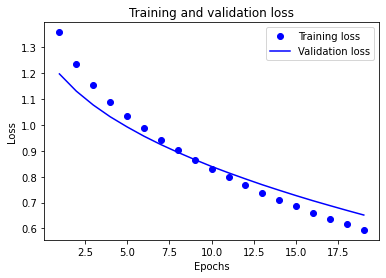

In [ ]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Text(0.5, 1.0, 'Training and validation accuracy')

Text(0.5, 0, 'Epochs')

Text(0, 0.5, 'Accuracy')

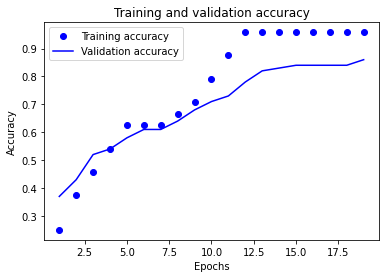

In [ ]:

plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
# make predictions for test data
y_pred = model.predict(X_test)

2/2 [==============================] - 0s 3ms/step


In [ ]:
print(y_pred[0].shape)
print(np.sum(y_pred[0]))

(3,)
1.0


# Retraining the model third time from scratch

In [ ]:
model = keras.Sequential([
    layers.Dense(24, activation="relu"),
    layers.Dense(24, activation="relu"),
    layers.Dense(24, activation="relu"),
    layers.Dense(24, activation="relu"),
    layers.Dense(3, activation="softmax")
])

In [ ]:

model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

In [ ]:
x_val = X_train[:100]
partial_x_train = X_train[100:]
y_val = Y_train[:100]
partial_y_train = Y_train[100:]

In [ ]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=25,
                    batch_size=100,
                    validation_data=(x_val, y_val))

Epoch 1/25
1/1 [==============================] - 1s 834ms/step - loss: 1.0596 - accuracy: 0.3750 - val_loss: 1.0315 - val_accuracy: 0.4100
Epoch 2/25
1/1 [==============================] - 0s 25ms/step - loss: 1.0240 - accuracy: 0.5000 - val_loss: 1.0137 - val_accuracy: 0.4400
Epoch 3/25
1/1 [==============================] - 0s 23ms/step - loss: 0.9979 - accuracy: 0.5417 - val_loss: 0.9962 - val_accuracy: 0.4600
Epoch 4/25
1/1 [==============================] - 0s 24ms/step - loss: 0.9766 - accuracy: 0.5417 - val_loss: 0.9811 - val_accuracy: 0.5400
Epoch 5/25
1/1 [==============================] - 0s 24ms/step - loss: 0.9570 - accuracy: 0.6667 - val_loss: 0.9646 - val_accuracy: 0.6000
Epoch 6/25
1/1 [==============================] - 0s 43ms/step - loss: 0.9377 - accuracy: 0.6667 - val_loss: 0.9487 - val_accuracy: 0.6300
Epoch 7/25
1/1 [==============================] - 0s 23ms/step - loss: 0.9188 - accuracy: 0.7083 - val_loss: 0.9309 - val_accuracy: 0.6800
Epoch 8/25
1/1 [==========

# 24 components-3 Hidden layer,epochs=25,batch_size=100,optimizer="rmsprop" 

Text(0.5, 1.0, 'Training and validation loss')

Text(0.5, 0, 'Epochs')

Text(0, 0.5, 'Loss')

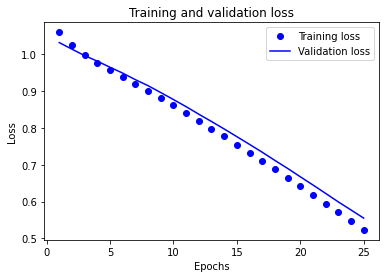

In [ ]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Text(0.5, 1.0, 'Training and validation accuracy')

Text(0.5, 0, 'Epochs')

Text(0, 0.5, 'Accuracy')

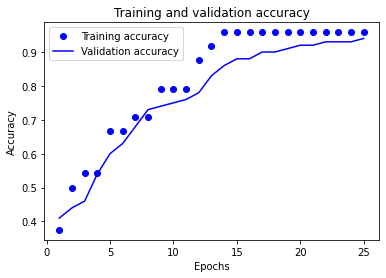

In [ ]:
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
# make predictions for test data
y_pred = model.predict(X_test)

2/2 [==============================] - 0s 5ms/step


In [ ]:
print(y_pred[0].shape)
print(np.sum(y_pred[0]))

(3,)
1.0


# Retraining the model fourth time from scratch

In [ ]:
model = keras.Sequential([
    layers.Dense(48, activation="relu"),
    layers.Dense(48, activation="relu"),
    layers.Dense(3, activation="softmax")
])

In [ ]:
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

In [ ]:
x_val = X_train[:100]
partial_x_train = X_train[100:]
y_val = Y_train[:100]
partial_y_train = Y_train[100:]

In [ ]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=10,
                    batch_size=80,
                    validation_data=(x_val, y_val))

Epoch 1/10
1/1 [==============================] - 1s 1s/step - loss: 1.0138 - accuracy: 0.6250 - val_loss: 0.9050 - val_accuracy: 0.6600
Epoch 2/10
1/1 [==============================] - 0s 30ms/step - loss: 0.9156 - accuracy: 0.7083 - val_loss: 0.8513 - val_accuracy: 0.7600
Epoch 3/10
1/1 [==============================] - 0s 59ms/step - loss: 0.8481 - accuracy: 0.9167 - val_loss: 0.8071 - val_accuracy: 0.7900
Epoch 4/10
1/1 [==============================] - 0s 32ms/step - loss: 0.7942 - accuracy: 0.9167 - val_loss: 0.7678 - val_accuracy: 0.8200
Epoch 5/10
1/1 [==============================] - 0s 28ms/step - loss: 0.7481 - accuracy: 0.9167 - val_loss: 0.7335 - val_accuracy: 0.8400
Epoch 6/10
1/1 [==============================] - 0s 29ms/step - loss: 0.7066 - accuracy: 0.9167 - val_loss: 0.7007 - val_accuracy: 0.8600
Epoch 7/10
1/1 [==============================] - 0s 29ms/step - loss: 0.6694 - accuracy: 0.9167 - val_loss: 0.6718 - val_accuracy: 0.8800
Epoch 8/10
1/1 [=============

# 48 components-1 Hidden layer,epochs=10,batch_size=80,optimizer="rmsprop" 

Text(0.5, 1.0, 'Training and validation loss')

Text(0.5, 0, 'Epochs')

Text(0, 0.5, 'Loss')

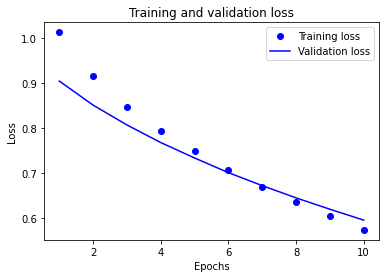

In [ ]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Text(0.5, 1.0, 'Training and validation accuracy')

Text(0.5, 0, 'Epochs')

Text(0, 0.5, 'Accuracy')

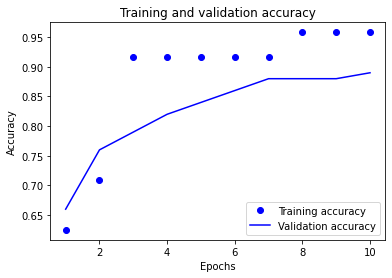

In [ ]:
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
# make predictions for test data
y_pred = model.predict(X_test)

2/2 [==============================] - 0s 6ms/step


In [ ]:
print(y_pred[0].shape)
print(np.sum(y_pred[0]))

(3,)
1.0


# Retraining the model fifth time from scratch

In [ ]:
model = keras.Sequential([
    layers.Dense(48, activation="relu"),
    layers.Dense(48, activation="relu"),
    layers.Dense(3, activation="softmax")
])

In [ ]:
model.compile(optimizer="adam",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

In [ ]:
x_val = X_train[:100]
partial_x_train = X_train[100:]
y_val = Y_train[:100]
partial_y_train = Y_train[100:]

In [ ]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=80,
                    validation_data=(x_val, y_val))

Epoch 1/20
1/1 [==============================] - 1s 538ms/step - loss: 1.3919 - accuracy: 0.3750 - val_loss: 1.2626 - val_accuracy: 0.4400
Epoch 2/20
1/1 [==============================] - 0s 26ms/step - loss: 1.3390 - accuracy: 0.4167 - val_loss: 1.2196 - val_accuracy: 0.4600
Epoch 3/20
1/1 [==============================] - 0s 26ms/step - loss: 1.2883 - accuracy: 0.4583 - val_loss: 1.1781 - val_accuracy: 0.4700
Epoch 4/20
1/1 [==============================] - 0s 26ms/step - loss: 1.2395 - accuracy: 0.5000 - val_loss: 1.1379 - val_accuracy: 0.4800
Epoch 5/20
1/1 [==============================] - 0s 28ms/step - loss: 1.1926 - accuracy: 0.5000 - val_loss: 1.0989 - val_accuracy: 0.5500
Epoch 6/20
1/1 [==============================] - 0s 27ms/step - loss: 1.1475 - accuracy: 0.5417 - val_loss: 1.0610 - val_accuracy: 0.5800
Epoch 7/20
1/1 [==============================] - 0s 27ms/step - loss: 1.1038 - accuracy: 0.5417 - val_loss: 1.0244 - val_accuracy: 0.6000
Epoch 8/20
1/1 [==========

# 48 components-1 Hidden layer,epochs=20,batch_size=80,optimizer="adam" 

Text(0.5, 1.0, 'Training and validation loss')

Text(0.5, 0, 'Epochs')

Text(0, 0.5, 'Loss')

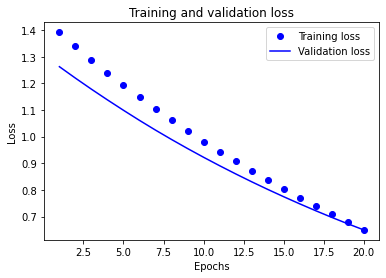

In [ ]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Text(0.5, 1.0, 'Training and validation accuracy')

Text(0.5, 0, 'Epochs')

Text(0, 0.5, 'Accuracy')

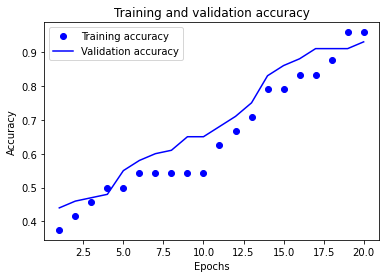

In [ ]:
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
# make predictions for test data
y_pred = model.predict(X_test)

2/2 [==============================] - 0s 6ms/step


In [ ]:
print(y_pred[0].shape)
print(np.sum(y_pred[0]))

(3,)
1.0000001


In [1]:
!jupyter nbconvert MBA06_Module3_Assignment1_AnandMohan.ipynb

[NbConvertApp] Converting notebook MBA06_Module3_Assignment1_AnandMohan.ipynb to html
[NbConvertApp] Writing 558553 bytes to MBA06_Module3_Assignment1_AnandMohan.html
